# Chewy Pharmacy Analysis （Web Scrapped Data)

In [3]:
# import scraped data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 4000
rx = pd.read_csv('chewyrx.csv')
rx.head(10)

brand                                         categories  \
0           VetOne            Pharmacy,Medications,Devices & Supplies   
1           VetOne            Pharmacy,Medications,Devices & Supplies   
2           VetOne            Pharmacy,Medications,Devices & Supplies   
3          Vetivex  Dog,Healthcare,Digestive & Urinary,Digestive H...   
4           Onsior                   Pharmacy,Pain Relief & Arthritis   
5       Lisinopril  Pharmacy,Health Conditions,Heart & Blood Pressure   
6  Fludrocortisone       Pharmacy,Health Conditions,Thyroid & Hormone   
7          Muricin                               Pharmacy,Skin & Coat   
8     Iverhart Max                                 Pharmacy,Heartworm   
9         Bravecto                    Dog,Flea & Tick,Spot Treatments   

                                             content  discount  num_review  \
0  There were only 2 reviews for this item, so I ...     21.71           3   
1  When i ordered this pill gun i was expecting t...     21.71           3   
2  My dog's pill is small. The grip at the tip wo...     21.71           3   
3                                                NaN      9.49           0   
4  We had gone on vacation and realized we didn’t...      0.97           1   
5                                                NaN      0.06           0   
6                                                NaN      0.62           0   
7                                                NaN     12.82           0   
8  My vet recommended this product to us for my 7...     33.61           1   
9  I ordered the topical because we have such tro...     49.00           6   

                                             product  regular  star  \
0        VetOne Pet Piller for Dogs & Cats, 12 count    21.71   4.3   
1        VetOne Pet Piller for Dogs & Cats, 12 count    21.71   4.3   
2        VetOne Pet Piller for Dogs & Cats, 12 count    21.71   4.3   
3  Vetivex Lactated Ringer’s and 5% Dextrose Inje...     9.99   0.0   
4                            Onsior Tablets for Dogs     1.02   5.0   
5                       Lisinopril (Generic) Tablets     0.06   0.0   
6  Fludrocortisone Acetate (Generic) Tablets, 0.1...     0.65   0.0   
7             Muricin Ointment for Dogs, 2%, 15 gram    13.49   0.0   
8  Iverhart Max Soft Chew 6-12 lbs, 6 treatments ...    35.38   5.0   
9  Bravecto Topical Solution for Dogs, 22-44 lbs,...    49.00   4.2   

                                               title  
0                                        pill popper  
1                                        great price  
2                                         Works fine  
3                                                NaN  
4                                    Refill medicine  
5                                                NaN  
6                                                NaN  
7                                                NaN  
8  My Chinese Crested Actually LOVES her Heartwor...  
9                                    Topical vs Chew

In [4]:
rx.shape

(11817, 9)

## Data Cleaning

In [6]:
# seperate categories column into 4 different columns for further analysis
rx=pd.concat([rx, rx['categories'].str.split(',', expand=True)], axis=1)
rx

brand                                         categories  \
0        VetOne            Pharmacy,Medications,Devices & Supplies   
1        VetOne            Pharmacy,Medications,Devices & Supplies   
2        VetOne            Pharmacy,Medications,Devices & Supplies   
3       Vetivex  Dog,Healthcare,Digestive & Urinary,Digestive H...   
4        Onsior                   Pharmacy,Pain Relief & Arthritis   
...         ...                                                ...   
11812  Bravecto                    Dog,Flea & Tick,Oral Treatments   
11813  Bravecto                    Dog,Flea & Tick,Oral Treatments   
11814  Bravecto                    Dog,Flea & Tick,Oral Treatments   
11815  Bravecto                    Dog,Flea & Tick,Oral Treatments   
11816  Bravecto                    Dog,Flea & Tick,Oral Treatments   

                                                 content  discount  \
0      There were only 2 reviews for this item, so I ...     21.71   
1      When i ordered this pill gun i was expecting t...     21.71   
2      My dog's pill is small. The grip at the tip wo...     21.71   
3                                                    NaN      9.49   
4      We had gone on vacation and realized we didn’t...      0.97   
...                                                  ...       ...   
11812  I am very happy with the results my princess K...     54.48   
11813  Your dog has to be tested heartworm negative b...     54.48   
11814  I appreciate Chewy, convenient, when ever I ne...     54.48   
11815  Our two Boston Terriers were infested with fle...     54.48   
11816  Thank you very much! Bravecto chews are great!...     54.48   

       num_review                                            product  regular  \
0               3        VetOne Pet Piller for Dogs & Cats, 12 count    21.71   
1               3        VetOne Pet Piller for Dogs & Cats, 12 count    21.71   
2               3        VetOne Pet Piller for Dogs & Cats, 12 count    21.71   
3               0  Vetivex Lactated Ringer’s and 5% Dextrose Inje...     9.99   
4               1                            Onsior Tablets for Dogs     1.02   
...           ...                                                ...      ...   
11812         118  Bravecto Chews for Dogs, 22-44 lbs, 1 treatmen...    54.48   
11813         118  Bravecto Chews for Dogs, 22-44 lbs, 1 treatmen...    54.48   
11814         118  Bravecto Chews for Dogs, 22-44 lbs, 1 treatmen...    54.48   
11815         118  Bravecto Chews for Dogs, 22-44 lbs, 1 treatmen...    54.48   
11816         118  Bravecto Chews for Dogs, 22-44 lbs, 1 treatmen...    54.48   

       star                               title         0  \
0       4.3                         pill popper  Pharmacy   
1       4.3                         great price  Pharmacy   
2       4.3                          Works fine  Pharmacy   
3       0.0                                 NaN       Dog   
4       5.0                     Refill medicine  Pharmacy   
...     ...                                 ...       ...   
11812   4.5                        Good results       Dog   
11813   4.5                      Great product!       Dog   
11814   4.5                       A small point       Dog   
11815   4.5                   Works as promised       Dog   
11816   4.5  Bravecto Chews for Dogs, 22-44 lbs       Dog   

                             1                    2                 3  
0                  Medications   Devices & Supplies              None  
1                  Medications   Devices & Supplies              None  
2                  Medications   Devices & Supplies              None  
3                   Healthcare  Digestive & Urinary  Digestive Health  
4      Pain Relief & Arthritis                 None              None  
...                        ...                  ...               ...  
11812              Flea & Tick      Oral Treatments              None  
11813              Flea & Tick      Oral Treat

In [8]:
# identify if the product is for dog/cat/dog&cat and create a new column 'pet' to indicate it
rx.loc[rx['product'].str.contains("Dogs"),'pet'] = 'Dogs'
rx.loc[rx['product'].str.contains("Cats"),'pet'] = 'Cats'

In [10]:
# rename columns
rx.columns = ['brand','categories','content','discount','num_review','product','regular','star','title','first','second','third','fourth','pet']
rx.head()

brand                                         categories  \
0   VetOne            Pharmacy,Medications,Devices & Supplies   
1   VetOne            Pharmacy,Medications,Devices & Supplies   
2   VetOne            Pharmacy,Medications,Devices & Supplies   
3  Vetivex  Dog,Healthcare,Digestive & Urinary,Digestive H...   
4   Onsior                   Pharmacy,Pain Relief & Arthritis   

                                             content  discount  num_review  \
0  There were only 2 reviews for this item, so I ...     21.71           3   
1  When i ordered this pill gun i was expecting t...     21.71           3   
2  My dog's pill is small. The grip at the tip wo...     21.71           3   
3                                                NaN      9.49           0   
4  We had gone on vacation and realized we didn’t...      0.97           1   

                                             product  regular  star  \
0        VetOne Pet Piller for Dogs & Cats, 12 count    21.71   4.3   
1        VetOne Pet Piller for Dogs & Cats, 12 count    21.71   4.3   
2        VetOne Pet Piller for Dogs & Cats, 12 count    21.71   4.3   
3  Vetivex Lactated Ringer’s and 5% Dextrose Inje...     9.99   0.0   
4                            Onsior Tablets for Dogs     1.02   5.0   

             title     first                   second                third  \
0      pill popper  Pharmacy              Medications   Devices & Supplies   
1      great price  Pharmacy              Medications   Devices & Supplies   
2       Works fine  Pharmacy              Medications   Devices & Supplies   
3              NaN       Dog               Healthcare  Digestive & Urinary   
4  Refill medicine  Pharmacy  Pain Relief & Arthritis                 None   

             fourth          pet  
0              None  Dogs & Cats  
1              None  Dogs & Cats  
2              None  Dogs & Cats  
3  Digestive Health         Cats  
4              None         Dogs

In [21]:
# identify if the product is for dog/cat/dog&cat for further analysis
# rx['pet'].isnull().sum()
rx.loc[rx['first'].str.contains("Dog"),'pet'] = 'Dogs'
rx.loc[rx['first'].str.contains("Cat"),'pet'] = 'Cats'
rx.loc[rx['product'].str.contains("Dogs & Cats"),'pet'] = 'Dogs & Cats'

In [23]:
# assign no indications of 'pet' into others
# rx['pet'].isnull().sum()
rx['pet'].isnull = "Other"

## Exploratory Analysis

In [29]:
rx2 = rx.copy()

In [30]:
# subset rx2 to unique product values to further analysis on brand/product/price
rx2=rx2.drop_duplicates(['product'])
rx2 = rx2.drop(['content','title'], 1)
rx2.head(10)
rx2.shape

brand                                         categories  \
0            VetOne            Pharmacy,Medications,Devices & Supplies   
3           Vetivex  Dog,Healthcare,Digestive & Urinary,Digestive H...   
4            Onsior                   Pharmacy,Pain Relief & Arthritis   
5        Lisinopril  Pharmacy,Health Conditions,Heart & Blood Pressure   
6   Fludrocortisone       Pharmacy,Health Conditions,Thyroid & Hormone   
7           Muricin                               Pharmacy,Skin & Coat   
8      Iverhart Max                                 Pharmacy,Heartworm   
9          Bravecto                    Dog,Flea & Tick,Spot Treatments   
12           Terumo            Pharmacy,Medications,Insulin & Diabetes   
16         Endosorb  Dog,Healthcare,Digestive & Urinary,Digestive H...   

    discount  num_review                                            product  \
0      21.71           3        VetOne Pet Piller for Dogs & Cats, 12 count   
3       9.49           0  Vetivex Lactated Ringer’s and 5% Dextrose Inje...   
4       0.97           1                            Onsior Tablets for Dogs   
5       0.06           0                       Lisinopril (Generic) Tablets   
6       0.62           0  Fludrocortisone Acetate (Generic) Tablets, 0.1...   
7      12.82           0             Muricin Ointment for Dogs, 2%, 15 gram   
8      33.61           1  Iverhart Max Soft Chew 6-12 lbs, 6 treatments ...   
9      49.00           6  Bravecto Topical Solution for Dogs, 22-44 lbs,...   
12     19.00           4  Terumo 3cc Luerlock Syringes with 22 Gauge Nee...   
16     68.99           2  Endosorb Anti-Diarrheal Tablets for Dogs & Cat...   

    regular  star     first                   second                   third  \
0     21.71   4.3  Pharmacy              Medications      Devices & Supplies   
3      9.99   0.0       Dog               Healthcare     Digestive & Urinary   
4      1.02   5.0  Pharmacy  Pain Relief & Arthritis                    None   
5      0.06   0.0  Pharmacy        Health Conditions  Heart & Blood Pressure   
6      0.65   0.0  Pharmacy        Health Conditions       Thyroid & Hormone   
7     13.49   0.0  Pharmacy              Skin & Coat                    None   
8     35.38   5.0  Pharmacy                Heartworm                    None   
9     49.00   4.2       Dog              Flea & Tick         Spot Treatments   
12    19.00   4.0  Pharmacy              Medications      Insulin & Diabetes   
16    68.99   3.5       Dog               Healthcare     Digestive & Urinary   

              fourth          pet  
0               None  Dogs & Cats  
3   Digestive Health         Dogs  
4               None         Dogs  
5               None          NaN  
6               None          NaN  
7               None         Dogs  
8               None          NaN  
9               None         Dogs  
12              None          NaN  
16  Digestive Health  Dogs & Cats

(450, 12)

### Regarding Reviews

(array([325.,  36.,  22.,  14.,   6.,   5.,   7.,   3.,   5.,   5.,   1.,
          2.,   1.,   1.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   0.  ,   11.52,   23.04,   34.56,   46.08,   57.6 ,   69.12,
          80.64,   92.16,  103.68,  115.2 ,  126.72,  138.24,  149.76,
         161.28,  172.8 ,  184.32,  195.84,  207.36,  218.88,  230.4 ,
         241.92,  253.44,  264.96,  276.48,  288.  ,  299.52,  311.04,
         322.56,  334.08,  345.6 ,

Text(0.5, 1.0, 'Distribution of Number of Reviews')

Text(0.5, 0, 'Number of Reviews')

Text(0, 0.5, 'Count')

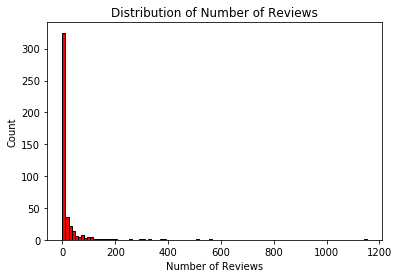

In [73]:
# number of reviews distribution
plt.hist(rx2.num_review, color = 'red', edgecolor = 'black',bins=100)
plt.title("Distribution of Number of Reviews")
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

                                     mean  count
brand                                           
NexGard                        301.000000      4
Carprofen                      243.500000      2
Heartgard                      204.000000      7
Terramycin                     130.500000      2
Trifexis                       113.000000      5
Interceptor Plus               100.250000      4
Revolution                      98.000000      8
Tri-Heart Plus                  92.000000      3
Simparica                       68.166667      6
Bravecto                        59.615385     13
Sentinel                        57.000000      4
Vetsulin                        53.333333      3
Rimadyl                         52.000000      2
Adequan                         44.500000      2
Sentinel Spectrum               32.500000      4
Comfortis                       27.200000      5
Meloxicam                       25.000000      2
UltiCare                        23.444444      9
Revolution Plus     

(array([11.,  8.,  1.,  3.,  5.,  5.,  3.,  1.,  2.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.,   4.,   7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.,
         34.,  37.,  40.,  43.,  46.,  49.,  52.,  55.,  58.,  61.,  64.,
         67.,  70.,  73.,  76.,  79.,  82.,  85.,  88.,  91.,  94.,  97.,
        100., 103., 106., 109., 112., 115., 118., 121., 124., 127., 130.,
        133., 136., 139., 142., 145., 148., 151., 154., 157., 160., 163.,
        166., 169., 172., 175., 178., 181., 184., 187., 190., 19

Text(0.5, 1.0, 'Distribution of Number of Reviews (have reviews)')

Text(0.5, 0, 'Number of Reviews')

Text(0, 0.5, 'Count')

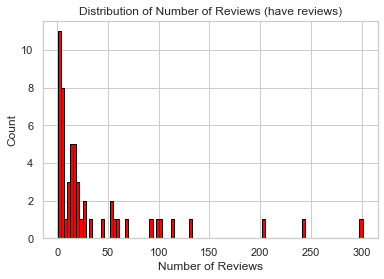

In [133]:
brandNumR = rx3.groupby('brand')['num_review'].agg(['mean','count'])
brandNumR = brandNumR[brandNumR['count']>1]
print(brandNumR.sort_values(by='mean',ascending=False))
plt.hist(np.asarray(brandNumR['mean'], dtype='float'), color = 'red', edgecolor = 'black',bins=100)
plt.title("Distribution of Number of Reviews (have reviews)")
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  7.,  0.,
         1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  5.,  0.,  0.,
         1.,  0.,  5.,  0.,  2.,  0.,  0.,  3.,  0.,  0., 15.,  0.,  6.,
         0.,  0., 10.,  0., 12.,  0.,  0.,  9.,  0., 18.,  0.,  0., 21.,
         0., 18.,  0., 47.,  0.,  0., 20.,  0., 84.]),
 array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
        1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
        1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
        2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
        2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  , 3.04, 3.08, 3.12, 3.16,
        3.2 , 3.24, 3.28, 3.32, 3.36, 3.4 , 3.44, 3.48, 3.52, 3.

Text(0.5, 1.0, 'Distribution of Star Ratings (have reviews)')

Text(0.5, 0, 'Star Ratings')

Text(0, 0.5, 'Count')

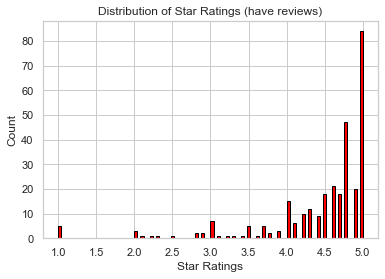

In [131]:
# From above, we see a lot of 0 values in the number of reviews
# Try to ignore these products with no reviews/ 0 star and see how people rate products
rx3=rx2[rx2.num_review>0]
plt.hist(rx3.star, color = 'red', edgecolor = 'black',bins=100)
plt.title("Distribution of Star Ratings (have reviews)")
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()

### Regarding Price

In [134]:
# percentage of no discount price
(rx2.shape[0]-sum(rx2['regular']!=rx2['discount']))/rx2.shape[0]*100

31.11111111111111

(array([139.,  33.,  44.,  22.,  23.,  24.,  14.,  17.,  15.,   9.,  22.,
         17.,   4.,   1.,   2.,   1.,   0.,   4.,   1.,   5.,   5.,   7.,
          9.,   4.,   8.,   2.,   2.,   0.,   0.,   2.,   1.,   2.,   0.,
          1.,   1.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([1.000000e-02, 4.908900e+00, 9.807800e+00, 1.470670e+01,
        1.960560e+01, 2.450450e+01, 2.940340e+01, 3.430230e+01,
        3.920120e+01, 4.410010e+01, 4.899900e+01, 5.389790e+01,
        5.879680e+01, 6.369570e+01, 6.859460e+01, 7.349350e+01,
        7.839240e+01, 8.329130e+01, 8.819020e+01, 9.308910e+01,

Text(0.5, 1.0, 'Distribution of Regular Price')

Text(0.5, 0, 'Regular Price')

Text(0, 0.5, 'Count')

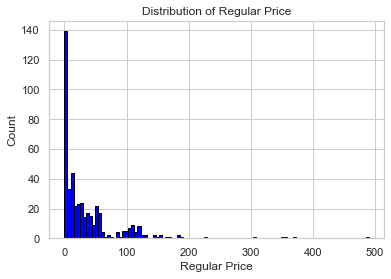

In [135]:
# regular price distribution
plt.hist(rx2.regular, color = 'blue', edgecolor = 'black',bins=100)
plt.title("Distribution of Regular Price")
plt.xlabel('Regular Price')
plt.ylabel('Count')
plt.show()

[Text(0, 0, 'Dogs & Cats'), Text(0, 0, 'Dogs'), Text(0, 0, 'Cats')]

Text(0.5, 0, 'Pet')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Price Range for Different Pets')

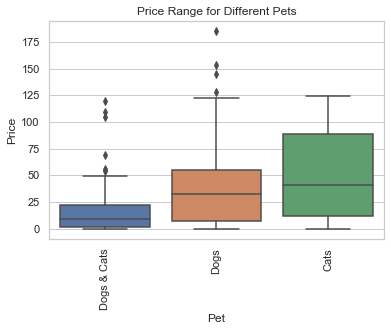

In [106]:
# price for pet, categories
# rx4 = rx3[rx3.regular>1]
sns.set(style="whitegrid")
chart=sns.boxplot(x="pet", y="regular", data=rx3)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.xlabel('Pet')
plt.ylabel('Price')
plt.title('Price Range for Different Pets')

[Text(0, 0, 'Medications'),
 Text(0, 0, 'Pain Relief & Arthritis'),
 Text(0, 0, 'Heartworm'),
 Text(0, 0, 'Flea & Tick'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Skin & Coat'),
 Text(0, 0, 'Health Conditions'),
 Text(0, 0, 'Allergy Relief')]

Text(0.5, 0, 'Types of Targeted Disease')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Price Range for Types of Targeted Disease')

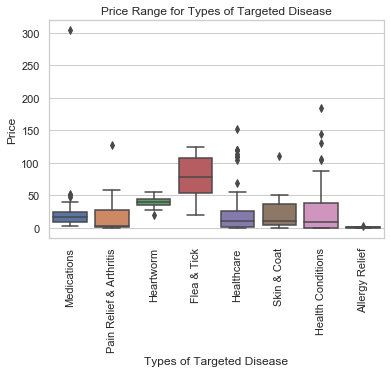

In [108]:
sns.set(style="whitegrid")
chart=sns.boxplot(x="second", y="regular", data=rx3)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.xlabel('Types of Targeted Disease')
plt.ylabel('Price')
plt.title('Price Range for Types of Targeted Disease')

[Text(0, 0, 'Devices & Supplies'),
 Text(0, 0, 'Spot Treatments'),
 Text(0, 0, 'Insulin & Diabetes'),
 Text(0, 0, 'Digestive & Urinary'),
 Text(0, 0, 'Thyroid & Hormone'),
 Text(0, 0, 'Oral Treatments'),
 Text(0, 0, 'Heart & Blood Pressure'),
 Text(0, 0, 'Ear Care'),
 Text(0, 0, 'Behavior & Anxiety'),
 Text(0, 0, 'Eye Care'),
 Text(0, 0, 'Seizure & Epilepsy'),
 Text(0, 0, 'Respiratory Care & Asthma'),
 Text(0, 0, 'Dewormers & Parasites'),
 Text(0, 0, 'Vitamins & Supplements'),
 Text(0, 0, 'Hip & Joint Care'),
 Text(0, 0, 'Antibiotics'),
 Text(0, 0, 'Immune Support')]

Text(0.5, 0, 'Treatment Types')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Price Range for Treatment Types')

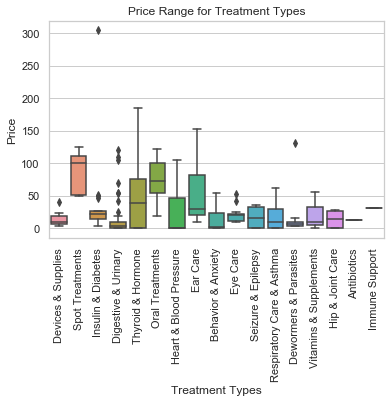

In [109]:
sns.set(style="whitegrid")
chart=sns.boxplot(x="third", y="regular", data=rx3)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.xlabel('Treatment Types')
plt.ylabel('Price')
plt.title('Price Range for Treatment Types')

### Regarding Brands

In [33]:
brandAvgReg = rx2.groupby('brand')['regular'].agg(['mean', 'count'])
brandAvgReg
print(brandAvgReg.sort_values(by='count',ascending=False))
print(brandAvgReg.sort_values(by='mean',ascending=False))
# Brand with the most products on Chewy Pharmacy: Bravecto
# Brand has the most expensive product on Chewy Pharmacy: Tildren

                          mean  count
brand                                
Bravecto             49.370000     16
UltiCare             20.303333     12
Revolution          114.535000      8
Heartgard            39.415000      8
Advantage Multi     108.194286      7
...                        ...    ...
Methylprednisolone    0.460000      1
Metoclopramide        0.060000      1
Metronidazole         0.220000      1
Cimetidine            0.420000      1
Medrol                0.460000      1

[263 rows x 2 columns]
                     mean  count
brand                           
Tildren           369.990      1
Viokase-V         354.380      1
SucroMate         349.990      1
Panacur           310.445      2
Lantus            304.300      1
...                   ...    ...
Lisinopril          0.060      1
Metoclopramide      0.060      1
Hydralazine         0.060      1
Diphenhydramine     0.020      1
Chlorpheniramine    0.010      1

[263 rows x 2 columns]


In [14]:
# brandAvgDis = rx2.groupby('brand')['discount'].agg(['mean','count'])
# brandAvgDis
# print(brandAvgDis.sort_values(by='mean',ascending=False))

                                     mean  count
brand                                           
NexGard                        301.000000      4
Carprofen                      243.500000      2
Heartgard                      204.000000      7
Terramycin                     130.500000      2
Trifexis                       113.000000      5
Interceptor Plus               100.250000      4
Revolution                      98.000000      8
Tri-Heart Plus                  92.000000      3
Simparica                       68.166667      6
Bravecto                        59.615385     13
Sentinel                        57.000000      4
Vetsulin                        53.333333      3
Rimadyl                         52.000000      2
Adequan                         44.500000      2
Sentinel Spectrum               32.500000      4
Comfortis                       27.200000      5
Meloxicam                       25.000000      2
UltiCare                        23.444444      9
Revolution Plus     

(array([11.,  8.,  1.,  3.,  5.,  5.,  3.,  1.,  2.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.,   4.,   7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.,
         34.,  37.,  40.,  43.,  46.,  49.,  52.,  55.,  58.,  61.,  64.,
         67.,  70.,  73.,  76.,  79.,  82.,  85.,  88.,  91.,  94.,  97.,
        100., 103., 106., 109., 112., 115., 118., 121., 124., 127., 130.,
        133., 136., 139., 142., 145., 148., 151., 154., 157., 160., 163.,
        166., 169., 172., 175., 178., 181., 184., 187., 190., 19

Text(0.5, 0, 'Mean Number of Reviews of All Brands')

Text(0.5, 1.0, 'Distribution of the Mean Number of Reviews of All Brands')

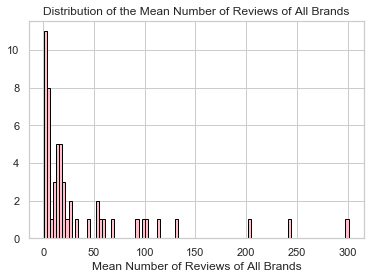

In [136]:
brandNumR = rx3.groupby('brand')['num_review'].agg(['mean','count'])
brandNumR = brandNumR[brandNumR['count']>1]
print(brandNumR.sort_values(by='mean',ascending=False))
plt.hist(np.asarray(brandNumR['mean'], dtype='float'), color = 'pink', edgecolor = 'black',bins=100)
plt.xlabel('Mean Number of Reviews of All Brands')
plt.title('Distribution of the Mean Number of Reviews of All Brands')

                                   mean  count
brand                                         
Remend                         5.000000      2
CheckUp                        5.000000      2
Iverhart Plus                  4.950000      2
Onsior                         4.950000      2
Interceptor                    4.925000      4
Fluoxetine                     4.900000      2
PancrePlus                     4.900000      2
Gentamicin                     4.900000      2
Furosemide                     4.866667      3
Tri-Heart Plus                 4.866667      3
Albon                          4.850000      2
Adequan                        4.800000      2
Trifexis                       4.780000      5
Revolution Plus                4.766667      3
Heartgard                      4.757143      7
Clavamox                       4.750000      2
NexGard                        4.750000      4
Advantage Multi                4.728571      7
Atopica                        4.700000      2
Meloxicam    

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0.,
        1., 0., 0., 1., 0., 3., 0., 2., 0., 1., 0., 1., 1., 1., 5., 2., 1.,
        1., 2., 1., 2., 2., 1., 1., 0., 1., 2., 3., 1., 2., 0., 2.]),
 array([2.75  , 2.7725, 2.795 , 2.8175, 2.84  , 2.8625, 2.885 , 2.9075,
        2.93  , 2.9525, 2.975 , 2.9975, 3.02  , 3.0425, 3.065 , 3.0875,
        3.11  , 3.1325, 3.155 , 3.1775, 3.2   , 3.2225, 3.245 , 3.2675,
        3.29  , 3.3125, 3.335 , 3.3575, 3.38  , 3.4025, 3.425 , 3.4475,
        3.47  , 3.4925, 3.515 , 3.5375, 3.56  , 3.5825, 3.605 , 3.6275,
        3.65  , 3.6725, 3.695 , 3.7175, 3.74  , 3.7625, 3.785 , 3.8075,
        3.83  , 3.8525, 3.875 , 3.8975, 3.92  , 3.9425, 3.965 , 3.9875,
        4.01  , 4.0325, 4.055 , 4.0775, 4.1   

Text(0.5, 0, 'Mean Star Ratings of All Brands')

Text(0.5, 1.0, 'Distribution of the Mean Star Ratings of All Brands')

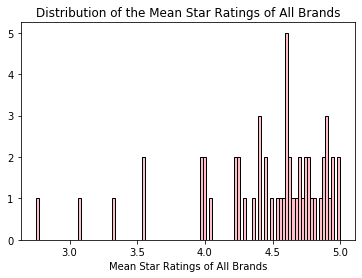

In [80]:
brandStar = rx3.groupby('brand')['star'].agg(['mean','count'])
brandStar = brandStar[brandStar['count']>1]
print(brandStar.sort_values(by='mean',ascending=False))
plt.hist(np.asarray(brandStar['mean'], dtype='float'), color = 'pink', edgecolor = 'black',bins=100)
plt.xlabel('Mean Star Ratings of All Brands')
plt.title('Distribution of the Mean Star Ratings of All Brands')

### Regarding Pets

In [81]:
# seperate rx2 into subsets with medicine for dog/cat/dog&cat
rxdog = rx2[rx2['pet'] == 'Dogs']
rxcat = rx2[rx2['pet'] == 'Cats']
rxboth = rx2[rx2['pet'] == 'Dogs & Cats']

In [138]:
# There are total of 219 products for dogs
rxdog['product'].value_counts().sum()
rxdog.brand.value_counts().sum()
rxdog.brand.value_counts().head(10)

219

219

Bravecto           10
Simparica           6
Heartgard           6
Revolution          6
Advantage Multi     5
Vetivex             5
Coraxis             5
Trifexis            5
Credelio            5
Comfortis           5
Name: brand, dtype: int64

In [137]:
# There are total of 46 products for cats
rxcat.brand.value_counts().sum()
rxcat['product'].value_counts().sum()
rxcat.brand.value_counts().head(10)

46

46

Bravecto           6
Profender          3
Revolution Plus    3
Interceptor        3
Advantage Multi    2
Heartgard          2
Revolution         2
Centragard         2
Kenalog            2
Semintra           1
Name: brand, dtype: int64

In [139]:
# There are total of 68 products for dogs and cats
rxboth.brand.value_counts().sum()
rxboth['product'].value_counts().sum()
rxboth.brand.value_counts().head(10)

# sizes = np.array([5860, 677, 3200])
# def absolute_value(val):
#     a  = np.round(val/100.*sizes.sum(), 0)
#     return a
# plt.pie(rxboth.brand.value_counts(),
# autopct=absolute_value, shadow=True, startangle=140)
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

68

68

AlphaTRAK        5
RenaPlus         3
iPet PRO         3
PanaKare Plus    2
Miconazole       2
PancrePlus       2
Neo-Poly-Bac     2
Gentamicin       2
Baytril          2
Clavamox         2
Name: brand, dtype: int64

Healthcare                 96
Flea & Tick                48
Health Conditions          26
Heartworm                  21
Pain Relief & Arthritis    15
Skin & Coat                11
Allergy Relief              1
Medications                 1
Name: second, dtype: int64

Text(0.5, 1.0, 'Type of Targeted Disease for Dogs')

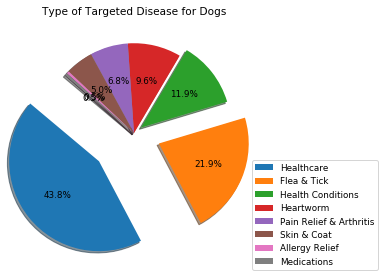

In [94]:
mpl.rcParams['font.size'] = 8.8
rxdog['second'].value_counts()
explode = (0.5, 0.3, 0.1, 0.,0,0,0,0)  # explode 1st slice
labels = ['Healthcare','Flea & Tick','Health Conditions','Heartworm',
          'Pain Relief & Arthritis',
         'Skin & Coat','Allergy Relief','Medications']
pie=plt.pie(rxdog['second'].value_counts(),explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.title('Type of Targeted Disease for Dogs')

Flea & Tick                13
Health Conditions          10
Healthcare                  9
Heartworm                   7
Skin & Coat                 3
Medications                 2
Pain Relief & Arthritis     2
Name: second, dtype: int64

Text(0.5, 1.0, 'Type of Targeted Disease for Cats')

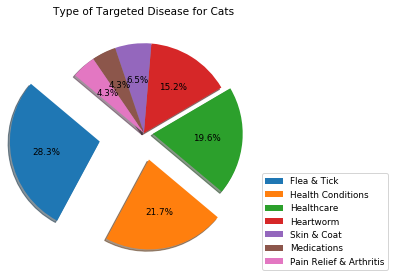

In [95]:
rxcat['second'].value_counts()
explode = (0.5, 0.3, 0.1, 0,0,0,0)  # explode 1st slice
labels = ['Flea & Tick','Health Conditions','Healthcare','Heartworm','Skin & Coat',
          'Medications','Pain Relief & Arthritis']
pie=plt.pie(rxcat['second'].value_counts(),explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.title('Type of Targeted Disease for Cats')

Healthcare                 37
Medications                15
Skin & Coat                10
Health Conditions           3
Pain Relief & Arthritis     2
Allergy Relief              1
Name: second, dtype: int64

Text(0.5, 1.0, 'Type of Targeted Disease for Dogs and Cats')

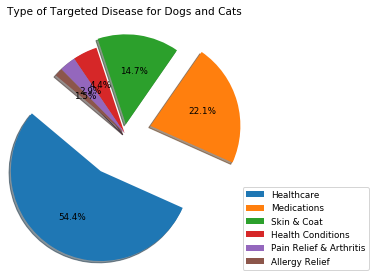

In [93]:
rxboth['second'].value_counts()
explode = (0.5, 0.3, 0.1, 0,0,0)  # explode 1st slice
labels = ['Healthcare','Medications','Skin & Coat','Health Conditions',
          'Pain Relief & Arthritis','Allergy Relief']
pie=plt.pie(rxboth['second'].value_counts(),explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.title('Type of Targeted Disease for Dogs and Cats')

Digestive & Urinary       61
Oral Treatments           38
Eye Care                  18
Ear Care                  16
Spot Treatments           10
Dewormers & Parasites      8
Thyroid & Hormone          7
Behavior & Anxiety         6
Seizure & Epilepsy         3
Heart & Blood Pressure     1
Immune Support             1
Devices & Supplies         1
Vitamins & Supplements     1
Name: third, dtype: int64

Text(0.5, 1.0, 'Treatment Type for Dogs')

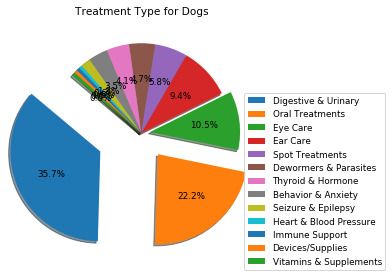

In [92]:
rxdog['third'].value_counts()
explode = (0.5, 0.3, 0.1, 0,0,0,0,0,0,0,0,0,0)  # explode 1st slice
labels = ['Digestive & Urinary','Oral Treatments','Eye Care','Ear Care',
          'Spot Treatments','Dewormers & Parasites',
         'Thyroid & Hormone','Behavior & Anxiety','Seizure & Epilepsy',
         'Heart & Blood Pressure','Immune Support','Devices/Supplies',
         'Vitamins & Supplements']
pie=plt.pie(rxdog['third'].value_counts(),explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.title('Treatment Type for Dogs')

Spot Treatments           13
Hip & Joint Care           8
Dewormers & Parasites      5
Thyroid & Hormone          4
Antibiotics                1
Heart & Blood Pressure     1
Devices & Supplies         1
Ear Care                   1
Name: third, dtype: int64

Text(0.5, 1.0, 'Treatment Type for Cats')

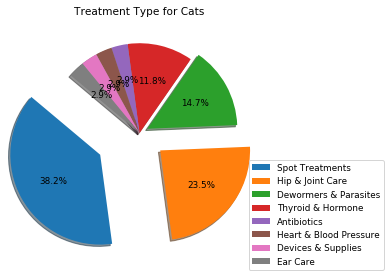

In [91]:
rxcat['third'].value_counts()
explode = (0.5, 0.3, 0.1, 0,0,0,0,0)  # explode 1st slice
labels = ['Spot Treatments','Hip & Joint Care','Dewormers & Parasites','Thyroid & Hormone','Antibiotics',
         'Heart & Blood Pressure','Devices & Supplies','Ear Care']
pie=plt.pie(rxcat['third'].value_counts(),explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.title('Treatment Type for Cats')

Digestive & Urinary       25
Insulin & Diabetes        12
Vitamins & Supplements     4
Ear Care                   4
Eye Care                   3
Devices & Supplies         3
Dewormers & Parasites      2
Thyroid & Hormone          1
Hip & Joint Care           1
Name: third, dtype: int64

Text(0.5, 1.0, 'Treatment Type for Dogs & Cats')

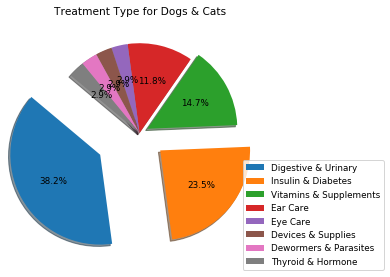

In [98]:
rxboth['third'].value_counts()
explode = (0.5, 0.3, 0.1, 0,0,0,0,0)  # explode 1st slice
labels = ['Digestive & Urinary','Insulin & Diabetes','Vitamins & Supplements','Ear Care',
         'Eye Care','Devices & Supplies','Dewormers & Parasites',
         'Thyroid & Hormone','Hip & Joint Care']
pie=plt.pie(rxcat['third'].value_counts(),explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.title('Treatment Type for Dogs & Cats')

In [100]:
#eliminate those without reviews
# 'Allergy Relief' medicine have the lowest rating star
# 'Devices & Supplies' and 'Vitamins & Supplements' have rating stars below 4
# star ratings are similar across different pets 
secondstar=rx3.groupby('second')['star'].agg(['mean'])
thirdstar=rx3.groupby('third')['star'].agg(['mean'])
petstar=rx3.groupby('pet')['star'].agg(['mean'])
print(secondstar.sort_values(by='mean',ascending=False))
print(thirdstar.sort_values(by='mean',ascending=False))
print(petstar.sort_values(by='mean',ascending=False))

                             mean
second                           
Pain Relief & Arthritis  4.782609
Flea & Tick              4.656140
Healthcare               4.470000
Heartworm                4.435714
Skin & Coat              4.435714
Health Conditions        4.373469
Medications              4.100000
Allergy Relief           3.600000
                               mean
third                              
Antibiotics                5.000000
Immune Support             5.000000
Ear Care                   4.773684
Spot Treatments            4.665000
Oral Treatments            4.651351
Hip & Joint Care           4.650000
Eye Care                   4.584615
Thyroid & Hormone          4.473333
Dewormers & Parasites      4.441667
Seizure & Epilepsy         4.375000
Digestive & Urinary        4.354902
Respiratory Care & Asthma  4.250000
Behavior & Anxiety         4.237500
Insulin & Diabetes         4.147619
Heart & Blood Pressure     4.100000
Devices & Supplies         3.973333
Vitamins & S

NLP Analysis

In [110]:
# extract all existing reviews
rxreviews=rx['content'].dropna().apply(lambda x: str(x))
rxreviews

0        There were only 2 reviews for this item, so I ...
1        When i ordered this pill gun i was expecting t...
2        My dog's pill is small. The grip at the tip wo...
3                                                      nan
4        We had gone on vacation and realized we didn’t...
                               ...                        
11812    I am very happy with the results my princess K...
11813    Your dog has to be tested heartworm negative b...
11814    I appreciate Chewy, convenient, when ever I ne...
11815    Our two Boston Terriers were infested with fle...
11816    Thank you very much! Bravecto chews are great!...
Name: content, Length: 11817, dtype: object

In [111]:
# convert review to list
rxlst=rxreviews.tolist()

In [112]:
# convert list of string to big string
allreviews=" ".join (rxlst)

In [113]:
# Convert all the string to lower cases
allreviews=allreviews.lower()
allreviews

'there were only 2 reviews for this item, so i read the description carefully and took a chance.  it was the right choice.  the tip of this piller is silicone and is split, so i would think most pills would fit in it.  the capsule i had to administer is the perfect fit.  the other half pill is a bit small, but still works.  it is safe for inserting - i like that the most.  the second most benefit - no bit fingers! when i ordered this pill gun i was expecting to only receive one. i guess i didn\'t read the description right because i got a pack of 12! that\'s a wonderful price for it. my dog\'s pill is small. the grip at the tip works great for grasping the pill. nan we had gone on vacation and realized we didn’t have enough medication to get through. our little bentley is in pain due to mauling by a much larger dog. thank you for helping nan nan nan my vet recommended this product to us for my 7 lb chinese crested poppy. to my surprise she really enjoys the taste and will eat it within

In [114]:
# filtering
import re
# \s+ means all empty space (\n, \r, \t)
allreviews =  re.sub('\s+', ' ', allreviews)
allreviews= re.sub('[^\w\s]', '', allreviews)
allreviews

'there were only 2 reviews for this item so i read the description carefully and took a chance it was the right choice the tip of this piller is silicone and is split so i would think most pills would fit in it the capsule i had to administer is the perfect fit the other half pill is a bit small but still works it is safe for inserting  i like that the most the second most benefit  no bit fingers when i ordered this pill gun i was expecting to only receive one i guess i didnt read the description right because i got a pack of 12 thats a wonderful price for it my dogs pill is small the grip at the tip works great for grasping the pill nan we had gone on vacation and realized we didnt have enough medication to get through our little bentley is in pain due to mauling by a much larger dog thank you for helping nan nan nan my vet recommended this product to us for my 7 lb chinese crested poppy to my surprise she really enjoys the taste and will eat it within seconds i have never had a dog l

In [115]:
# import stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/inaba3910/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
# add no meaning frequently appeared words to stop words
stop.append('dog')
stop.append('cat')
stop.append('one')
stop.append('use')

In [121]:
# remove stop words and do stemming
allreviews= " ".join(word for word in allreviews.split() if word not in stop)
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
allreviews = ' '.join([stemmer.stem(word) for word in allreviews.split()])

In [122]:
#find root of the words

import nltk
nltk.download('wordnet')
  
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()
allreviews = lemztr.lemmatize(allreviews)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inaba3910/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<Figure size 864x432 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

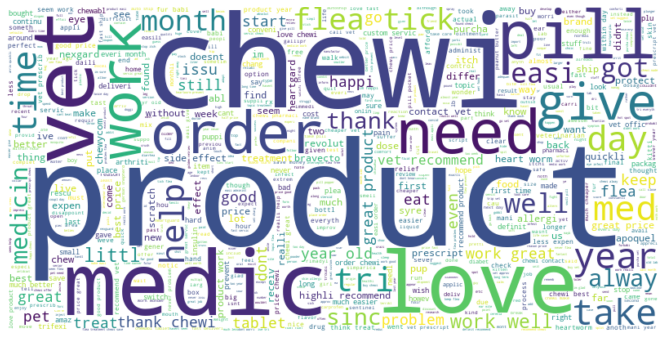

In [123]:
# generate word cloud
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)

# generate word cloud
wc.generate(allreviews)
# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [124]:
# Univariate visualization with Plotly and TextBlob
# text cleaning
from textblob import TextBlob
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

rx['content']=rx['content'].dropna()
rx['content'] = preprocess(rx['content'])
rx['content'] = rx['content'].astype(str)
# type(rx['content'][0])
rx['polarity'] = rx['content'].map(lambda text: TextBlob(text).sentiment.polarity)
rx['review_len'] = rx['content'].astype(str).apply(len)
rx['word_count'] = rx['content'].apply(lambda x: len(str(x).split()))

In [125]:
# link plotly with pandas
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [60]:
# The distribution of review sentiment polarity score
rx['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')
# most people left positive and neutral reviews

In [127]:
# The distribution review text lengths
rx['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [126]:
# The distribution of review word count
rx['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')
# most people left short reviews about 40 words

In [128]:
# The distribution of top unigrams after removing stop words
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(rx['content'], 20)
for word, freq in common_words:
    print(word, freq)
dfuni = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
dfuni.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

chewy 3911
dog 3647
vet 3338
product 2804
great 2332
dogs 1864
price 1695
fleas 1484
years 1342
works 1338
easy 1317
like 1248
pill 1168
time 1132
flea 1132
love 1116
just 1112
use 1089
using 1087
used 1072


In [129]:
# The distribution of top bigrams after removing stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(rx['content'], 20)
for word, freq in common_words:
    print(word, freq)
dfbi = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
dfbi.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

year old 363
great product 353
works great 348
flea tick 342
chewy com 337
fleas ticks 315
highly recommend 299
vet recommended 293
great price 278
customer service 216
heart worm 212
thank chewy 198
best price 189
thanks chewy 188
easy use 187
using product 184
love chewy 175
product works 163
ve used 160
contacted vet 147


In [130]:
# The distribution of Top trigrams after removing stop words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(rx['content'], 20)
for word, freq in common_words:
    print(word, freq)
dftri = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
dftri.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

chewy best price 74
chewy contacted vet 65
using product years 57
used product years 56
product works great 49
12 year old 46
great customer service 43
14 year old 42
year old dog 39
vet recommended product 37
13 year old 36
year old lab 36
highly recommend product 35
10 year old 34
ve used product 32
11 year old 30
chewy took care 29
great product great 28
flea tick prevention 28
15 year old 28
